The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
flow field for shear flow i x direction


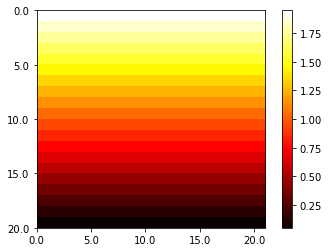

flow field for shear flow i y direction


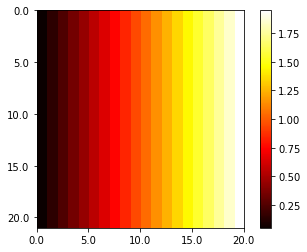

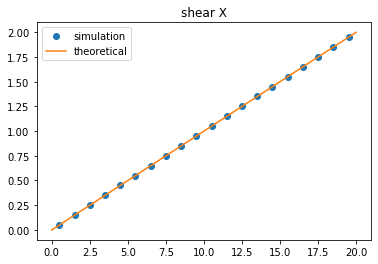

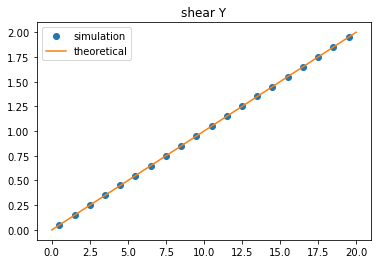

In [16]:
%reset -f
%load_ext autoreload
%autoreload 2

import Odin
import numpy as np
import matplotlib.pyplot as plt

# validation test for incompressible flow
# the temperature along the x-axis should develop as:
def velProfile( y,D,U ):
    return y*U/D

movingWallVelocity = 2

geom = Odin.createGeometry( 'rectangle', [20,20] )
mesh = Odin.createMesh( geom, res=1 )

# make just a list, give a name as optional parameter to flow model
# make this a flowmodeles constructor with kwargs here and then remove simulation instance
flowModels = {
    'u' : Odin.TransportModels.staggeredTransport_u,
    'v' : Odin.TransportModels.staggeredTransport_v
}

passiveFields = {
    'p':'scalarCV'
}

Odin.initialize(flowModels, mesh, geom, passiveFields=passiveFields )

u=Odin.getField('u')
v=Odin.getField('v')

# relates to viscosity:
u.govModel.setDiffusionCoefficient(1)
v.govModel.setDiffusionCoefficient(1)

u.data.fill(0.0)
Odin.defineBoundaryCondition(field=u, boundaryName='top', type='fixedValue', value=movingWallVelocity)
Odin.defineBoundaryCondition(field=u, boundaryName='bottom', type='fixedValue', value=0 )
Odin.defineBoundaryCondition(field=u, boundaryName='right', type='zeroGradient' )
Odin.defineBoundaryCondition(field=u, boundaryName='left', type='zeroGradient')

v.data.fill(0.0)
Odin.defineBoundaryCondition(field=v, boundaryName='top', type='zeroGradient')
Odin.defineBoundaryCondition(field=v, boundaryName='bottom', type='zeroGradient')
Odin.defineBoundaryCondition(field=v, boundaryName='left', type='fixedValue', value=0 )
Odin.defineBoundaryCondition(field=v, boundaryName='right', type='fixedValue', value=0)

u.data = Odin.solve(u)
print("flow field for shear flow i x direction")
Odin.display(u,mesh)
plotData_u = np.copy(np.flip(u.data[:,-1]))

u.data.fill(0.0)
Odin.defineBoundaryCondition(field=u, boundaryName='top', type='fixedValue', value=0)
Odin.defineBoundaryCondition(field=u, boundaryName='bottom', type='fixedValue', value=0 )
Odin.defineBoundaryCondition(field=u, boundaryName='right', type='zeroGradient' )
Odin.defineBoundaryCondition(field=u, boundaryName='left', type='zeroGradient')

v.data.fill(0.0)
Odin.defineBoundaryCondition(field=v, boundaryName='top', type='zeroGradient')
Odin.defineBoundaryCondition(field=v, boundaryName='bottom', type='zeroGradient')
Odin.defineBoundaryCondition(field=v, boundaryName='left', type='fixedValue', value=0 )
Odin.defineBoundaryCondition(field=v, boundaryName='right', type='fixedValue', value=movingWallVelocity)

v.data = Odin.solve(v)
print("flow field for shear flow i y direction")
Odin.display(v,mesh)
plotData_v = np.copy(v.data[2,:])

#-------------------- plotting shear fores in x-direction:
cellSpacing = mesh.uniformSpacing
ySim = np.linspace(0+0.5*cellSpacing,geom.lenY-0.5*cellSpacing,mesh.cells_y)
yTheo = np.linspace(0,geom.lenY, 100)

ax = plt.gca()
ax.plot(ySim, plotData_u, 'o', label='simulation')
ax.plot(yTheo, velProfile(yTheo,geom.lenY,movingWallVelocity), label='theoretical')
ax.set_title("shear X")
plt.legend()
plt.show()

#-------------------- plotting shear fores in y-direction:
xSim = np.linspace(0+0.5*cellSpacing,geom.lenX-0.5*cellSpacing,mesh.cells_x)
xTheo = np.linspace(0,geom.lenX, 100)

plt.figure()
ax1 = plt.gca()
ax1.plot(xSim, plotData_v, 'o', label='simulation')
ax1.plot(xTheo, velProfile(xTheo,geom.lenX,movingWallVelocity), label='theoretical')
ax1.set_title("shear Y")

plt.legend()
plt.show()

In [ ]:
# shutting the interpreter down, so I can a fresh instance next time.
# my modules are automatically checked for updates
import os
os._exit(00)
